In [12]:
import pandas as pd
import missingno as msno

dataframe=pd.read_csv("https://raw.githubusercontent.com/mpaydar/Restaurant_and_food_inspection_dataset/main/restaurant-and-food-inspections-1.csv")
dataframe.head()





,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_phone_number,inspection_date,inspection_score,inspection_description,inspection_type,violation_description,violation_code,business_location
0,FA0005362 (https://anchorageonline.envisioncon...,MCGINLEYS PUB,645 G ST,ANCHORAGE,AK,99501,9.072792e+09,3/7/2017,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",8,"645 G ST\nANCHORAGE, AK 99501\n(61.2157799112,..."
1,FA0000274 (https://anchorageonline.envisioncon...,VILLAGE INN #1,1130 E NORTHERN LIGHTS BLVD,ANCHORAGE,AK,995084219,9.072796e+09,10/21/2015,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,1,"1130 E NORTHERN LIGHTS BLVD\nANCHORAGE, AK 995..."
2,FA0007874 (https://anchorageonline.envisioncon...,RONNIE SUSHI 2,924 MULDOON RD,ANCHORAGE,AK,99504,9.073380e+09,11/22/2016,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,34,"924 MULDOON RD\nANCHORAGE, AK 99504\n(61.21387..."
3,FA0001485 (https://anchorageonline.envisioncon...,FRED MEYER - RETAIL FISH,1000 E NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,NaN,12/23/2003,96.0,NO ACTION,Regular,NaN,NaN,"1000 E NORTHERN LIGHTS BLVD\nANCHORAGE, AK 995..."
4,FA0009047 (https://anchorageonline.envisioncon...,PHO GRILL,8809 JEWEL LAKE RD,ANCHORAGE,AK,99502,9.078682e+09,7/13/2017,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,7,"8809 JEWEL LAKE RD\nANCHORAGE, AK 99502\n(61.1..."


In this analysis, we won't need business_id, business_address,business_phone_number,and business location so we will drop them to  prepare the more appropriate for the our purpose. 

## Dropping the unneccessary columns

In [13]:
dataframe=dataframe.drop(['business_phone_number','business_id','business_address','business_phone_number',"business_location"],axis=1)
dataframe.head()

,business_name,business_city,business_state,business_postal_code,inspection_date,inspection_score,inspection_description,inspection_type,violation_description,violation_code
0,MCGINLEYS PUB,ANCHORAGE,AK,99501,3/7/2017,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",8
1,VILLAGE INN #1,ANCHORAGE,AK,995084219,10/21/2015,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,1
2,RONNIE SUSHI 2,ANCHORAGE,AK,99504,11/22/2016,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,34
3,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,12/23/2003,96.0,NO ACTION,Regular,NaN,NaN
4,PHO GRILL,ANCHORAGE,AK,99502,7/13/2017,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,7


The job is done and now we have eliminated the fields we won't be working in our analysis. Now, let's look at different data types in the dataset.

In [14]:


df_info = pd.DataFrame(dataframe.dtypes,columns=['Dtype'])
df_info['Nunique'] = dataframe.nunique()
df_info['MissingValues']=dataframe.isnull().sum()
df_info['Count']=dataframe.count()
df_info['ZeroValues']=(dataframe==0).sum()
df_info['?']=(dataframe=='?').sum()
df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues,?
business_name,object,1755,0,45006,0,0
business_city,object,10,0,45006,0,0
business_state,object,2,0,45006,0,0
business_postal_code,int64,52,0,45006,0,0
inspection_date,object,4483,0,45006,0,0
inspection_score,float64,33,17828,27178,0,0
inspection_description,object,13,0,45006,0,0
inspection_type,object,14,0,45006,0,0
violation_description,object,176,14491,30515,0,0
violation_code,object,99,14490,30516,0,0


The first thing that stands out from this table is the number of states which suppose to be only Alaska however we see two.
The second fact that is prominant in the table is the number of missing values for inspection score(17,828),violation_description(14491),violation_code(14490). 

It is important to note that this data is from the Alaska inspection records, and any other enteries could be interpreted as invalid enteries, so we have to eliminate those invalid enteries to prepare the data further.Since all the data is for one state it won't provide any useful insights , so we can drop the entire state column. 

## Dropping the state column 

In [15]:
dataframe=dataframe.drop("business_state",axis=1)
dataframe.head()

,business_name,business_city,business_postal_code,inspection_date,inspection_score,inspection_description,inspection_type,violation_description,violation_code
0,MCGINLEYS PUB,ANCHORAGE,99501,3/7/2017,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",8
1,VILLAGE INN #1,ANCHORAGE,995084219,10/21/2015,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,1
2,RONNIE SUSHI 2,ANCHORAGE,99504,11/22/2016,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,34
3,FRED MEYER - RETAIL FISH,ANCHORAGE,99503,12/23/2003,96.0,NO ACTION,Regular,NaN,NaN
4,PHO GRILL,ANCHORAGE,99502,7/13/2017,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,7


## Visualizing of the missing values observation within dataset

<AxesSubplot: >

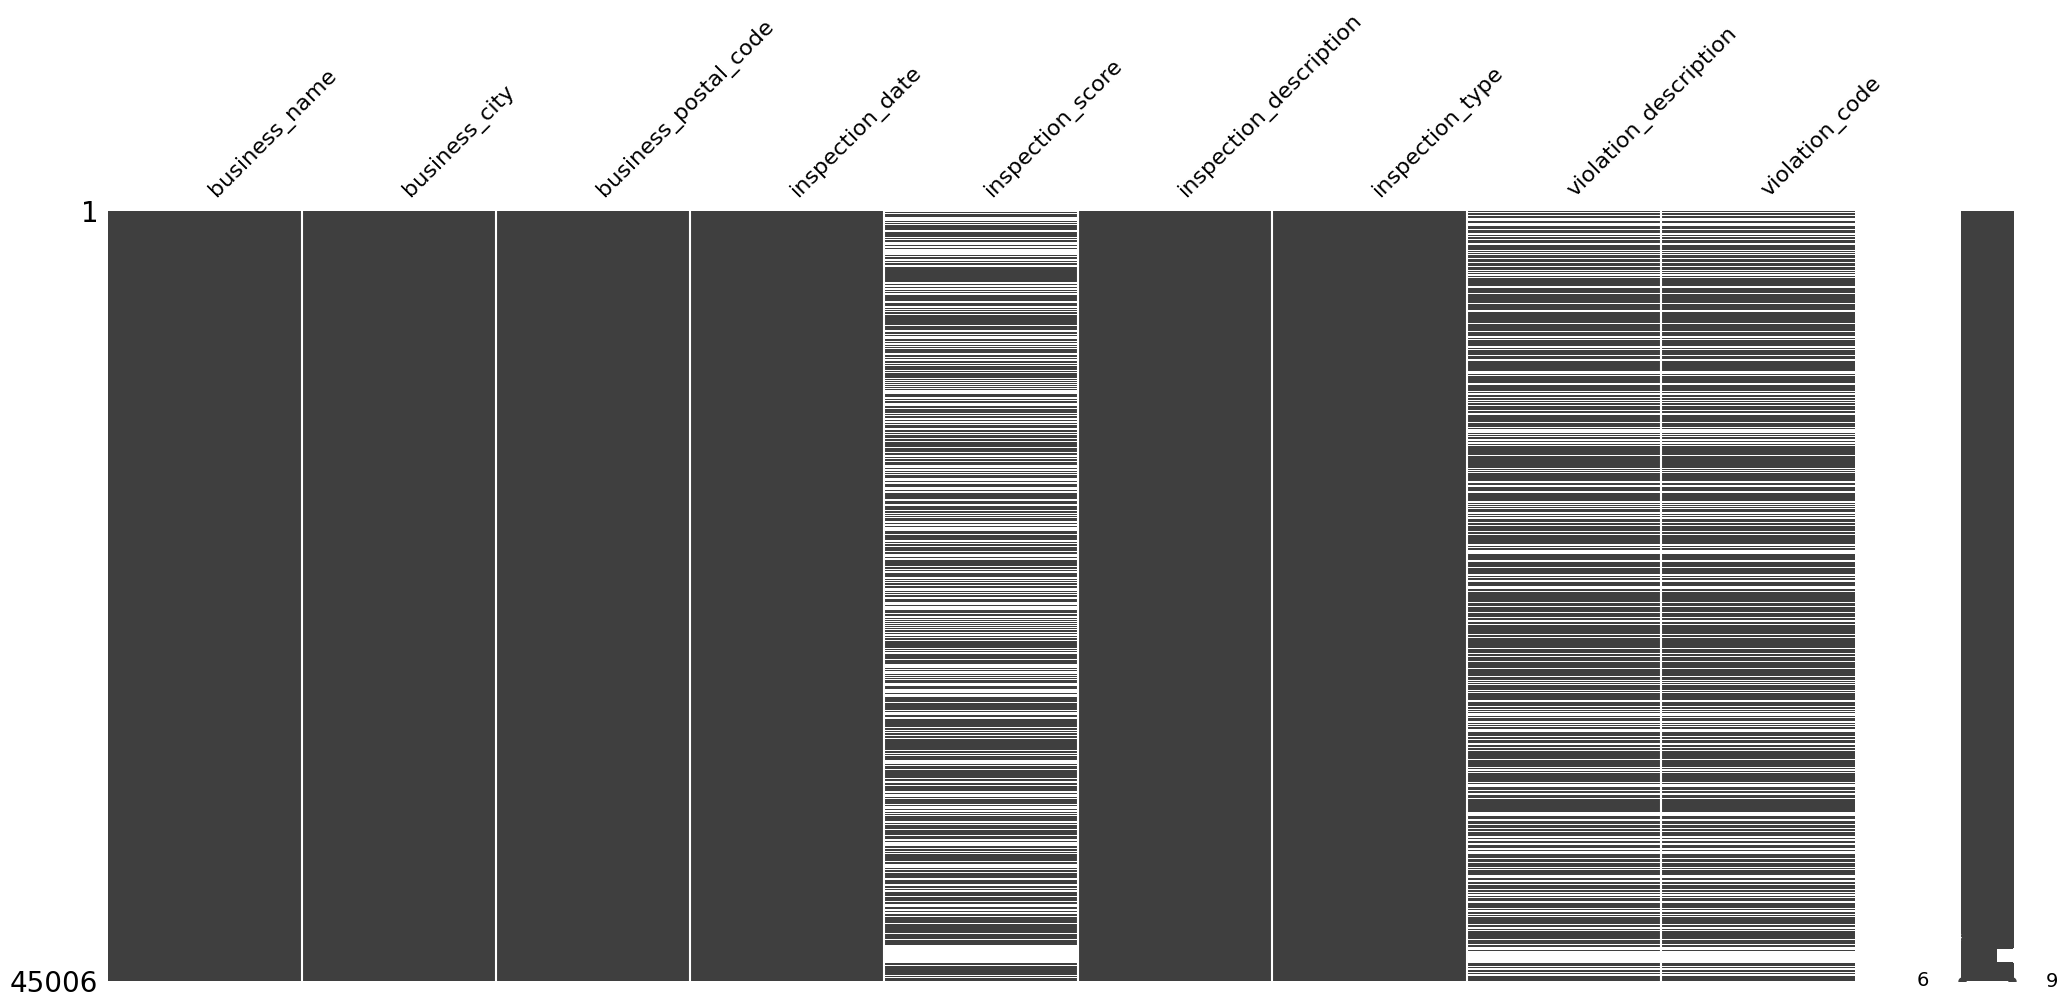

In [16]:
msno.matrix(dataframe)

Since we have so many missing values for inspection_score, violation description and violation code it must be handle to aviod any complications further down the analysis. To resolve this issue, we will be dropping all NA values in the dataset.

## Dropping N/A values

In [17]:
dataframe=dataframe.dropna()

## Visualizing the dataset after dropna resolution

<AxesSubplot: >

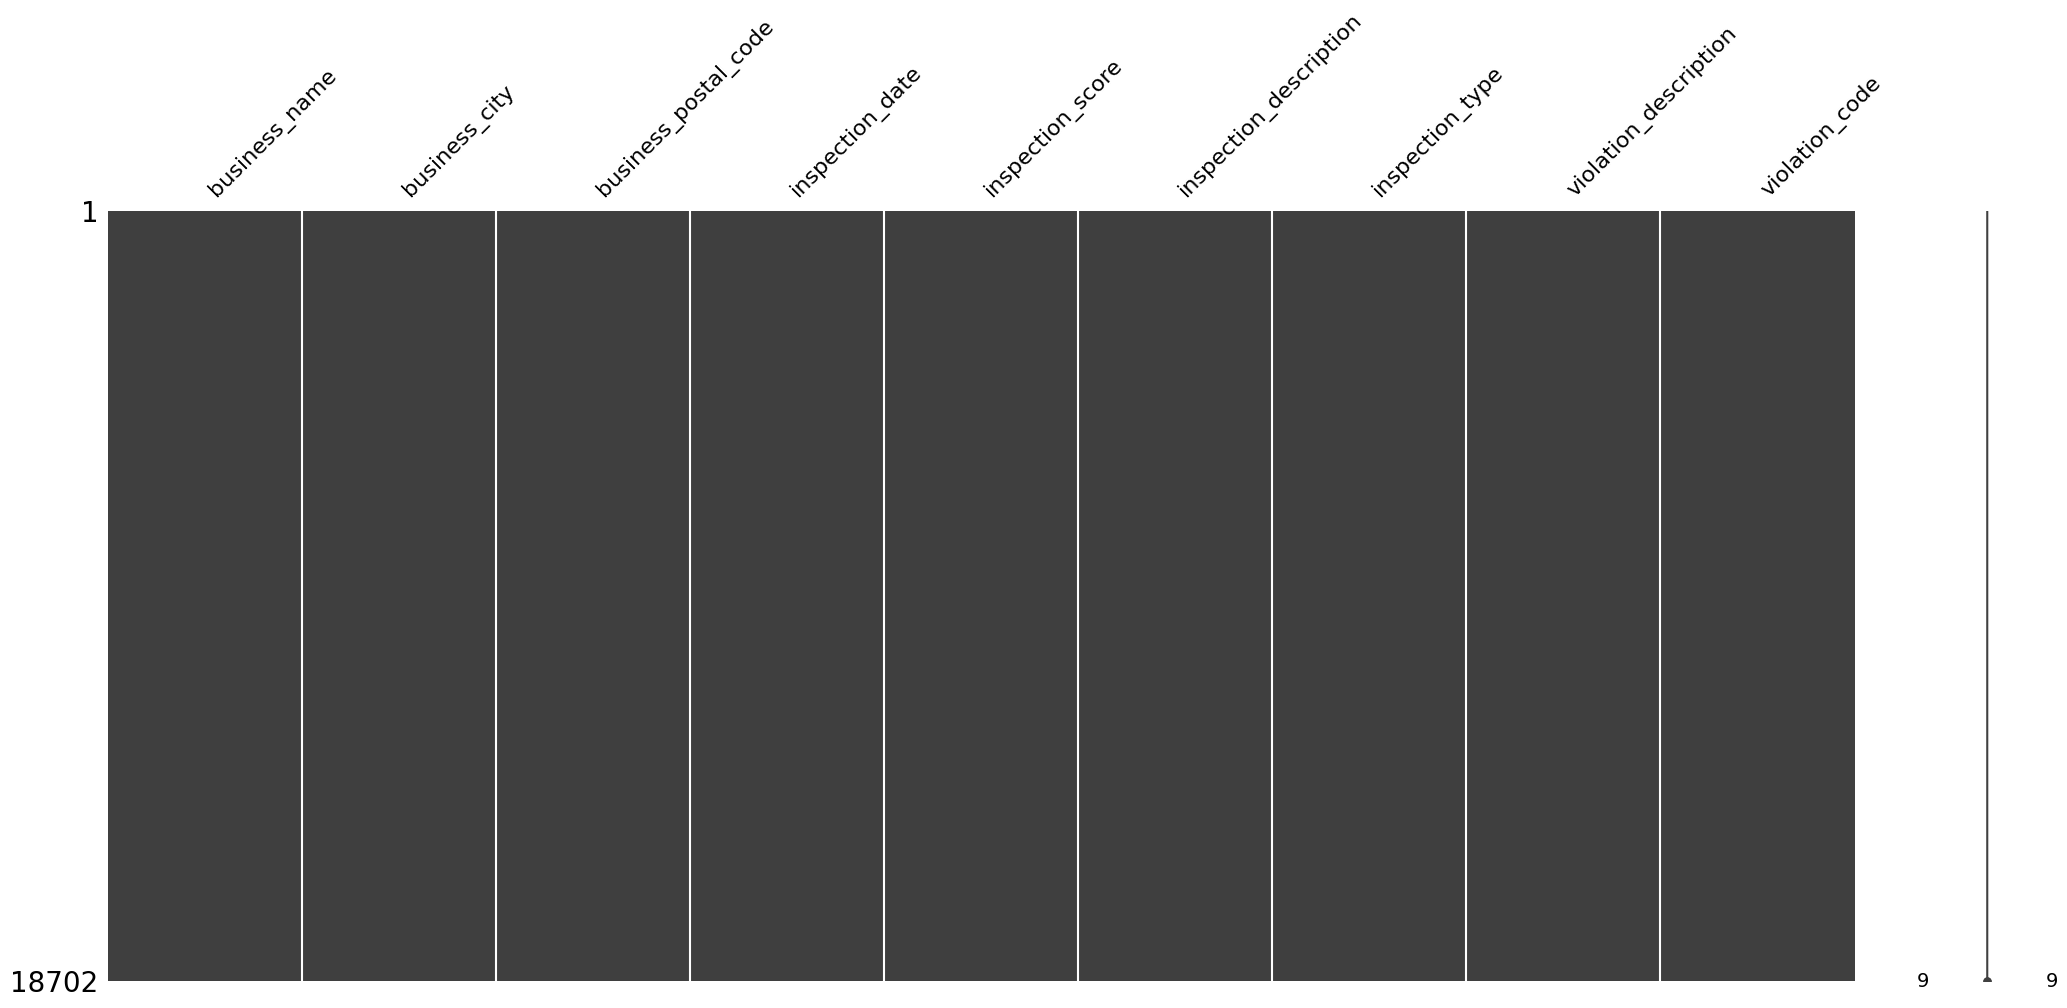

In [18]:
msno.matrix(dataframe)